In [26]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.datasets import load_iris

from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
data = pd.DataFrame([['seminovo','baixa','sim','vendido'],
              ['seminovo','alta','sim','vendido'],
              ['usado','baixa','não','não vendido'],
              ['seminovo','alta','não','não vendido']],columns=['tipo','km','testdrive','venda'])

In [5]:
data

,tipo,km,testdrive,venda
0,seminovo,baixa,sim,vendido
1,seminovo,alta,sim,vendido
2,usado,baixa,não,não vendido
3,seminovo,alta,não,não vendido


In [6]:
for coluna in data.columns:
    data[coluna] = data[coluna].astype('category').cat.codes

In [7]:
data

,tipo,km,testdrive,venda
0,0,1,1,1
1,0,0,1,1
2,1,1,0,0
3,0,0,0,0


In [8]:
X = data.drop('venda',axis=1)
y = data.venda

In [9]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

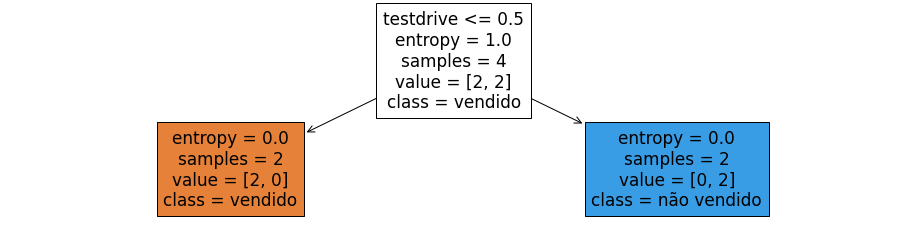

In [10]:
fig = plt.figure(figsize=(16,4))
_ = tree.plot_tree(clf, 
                   feature_names=data.columns[:-1],  
                   class_names=['vendido','não vendido'],
                   filled=True)

## Continuando

In [11]:
data = (
    pd.read_csv('../data/more_data.csv',names=['x1','x2','y'],skiprows=1)
    .assign(y = lambda x: x.y.astype('category').cat.codes))
data.head()

,x1,x2,y
0,272.760976,50.613428,0
1,263.662778,65.274752,0
2,252.882212,69.892196,0
3,206.713971,93.648246,0
4,269.163682,134.482615,0


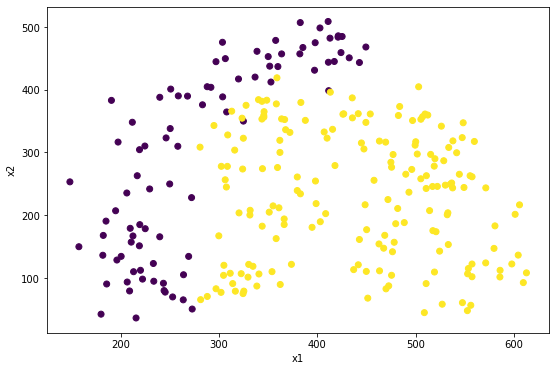

In [12]:
f,ax = plt.subplots(figsize=(9,6))
ax.scatter(data.x1,data.x2,c=data.y)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
plt.show()

In [13]:
X = data.drop('y',axis=1)
y = data.y

In [14]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=2)
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

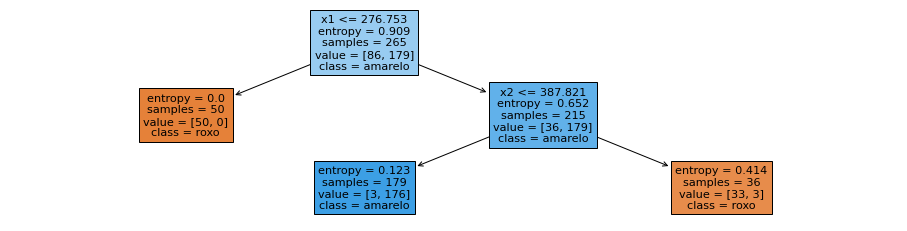

In [19]:
fig = plt.figure(figsize=(16,4))
_ = tree.plot_tree(clf, 
                   feature_names=data.columns[:-1],
                   class_names=['roxo','amarelo'],
                   filled=True)

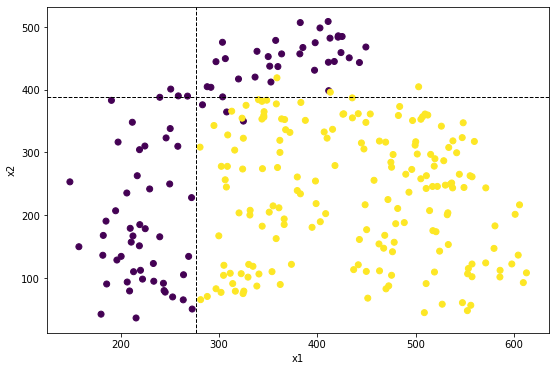

In [20]:
f,ax = plt.subplots(figsize=(9,6))
ax.scatter(data.x1,data.x2,c=data.y)

ax.axvline(276.753,ls='--',c='black',lw=1)
ax.axhline(387.821,ls='--',c='black',lw=1)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
plt.show()

In [27]:
## encontrando a probabilidade

clf.predict_proba([[277,412]])

array([[0.91666667, 0.08333333]])

In [29]:
## entendendo o valor da probabilidade

33/36

0.9166666666666666